<a href="https://colab.research.google.com/github/Edenshmuel/PapaJohns_Data_Science_Project/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import os

folder_path = '/content/drive/MyDrive/Final_Progect_PapaJohns'
files = os.listdir(folder_path)

print(files)

['Files', '2024_combined_2.csv', '2023_combined_2.csv', '2022_combined_2.csv', '2023_combined.xlsx', '2022_combined3.csv', '2024_combined.xlsx', '2022_combined.xlsx', '2022_combined.csv', '2025_combined.csv', '2023_combined.csv', '2024_combined.csv', '2023_combined.gsheet']


In [ ]:
df_2022 = pd.read_excel('/content/drive/MyDrive/Final_Progect_PapaJohns/2022_combined.xlsx')
df_2023 = pd.read_excel('/content/drive/MyDrive/Final_Progect_PapaJohns/2023_combined.xlsx')
df_2024 = pd.read_excel('/content/drive/MyDrive/Final_Progect_PapaJohns/2024_combined.xlsx')

In [ ]:
df_2022.tail()

,תאריך,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה,Date,Month
37423,NaT,NaN,NaN,2521,(א) פיצה L קלאסית + 2 פחיות + אצבעות גבינה ב-9...,NaN,30,3132.9,0.0,99.0,NaT,12
37424,NaT,NaN,NaN,2522,(א) פיצה משפחתית קלאסית + 2 קינוחי רולס לבחיר...,NaN,11,1173.4,0.0,99.0,NaT,12
37425,NaT,NaN,NaN,2531,(ת) מארז 4 פחיות,NaN,11,0.0,0.0,NaN,NaT,12
37426,NaT,NaN,NaN,2532,(ת) מארז 2 פחיות,NaN,30,0.0,0.0,NaN,NaT,12
37427,NaT,NaN,NaN,2533,(ת) מארז 3 רטבים,NaN,15,0.0,0.0,NaN,NaT,12


In [ ]:
nan_summary = pd.DataFrame({
    'Missing Values': df_2022.isna().sum(),
    'Percentage (%)': (df_2022.isna().mean() * 100).round(2)
})

nan_summary = nan_summary[nan_summary['Missing Values'] > 0]  # רק עמודות עם ערכים חסרים
nan_summary.sort_values('Missing Values', ascending=False)

,Missing Values,Percentage (%)
תאור סוג,2818,7.53
תאריך,1244,3.32
סוג פריט,1244,3.32
הזמנה,1244,3.32
Date,1244,3.32
אחרי הנחה,174,0.46
תאור פריט,111,0.30


In [ ]:
nan_summary = pd.DataFrame({
    'Missing Values': df_2023.isna().sum(),
    'Percentage (%)': (df_2023.isna().mean() * 100).round(2)
})

nan_summary = nan_summary[nan_summary['Missing Values'] > 0]  # רק עמודות עם ערכים חסרים
nan_summary.sort_values('Missing Values', ascending=False)

,Missing Values,Percentage (%)
תאור סוג,4359,5.74
סכום,1216,1.60
Date,1216,1.60
תאריך,652,0.86
סוג פריט,652,0.86
הזמנה,652,0.86
תאור פריט,81,0.11
אחרי הנחה,74,0.10


In [ ]:
nan_summary = pd.DataFrame({
    'Missing Values': df_2024.isna().sum(),
    'Percentage (%)': (df_2024.isna().mean() * 100).round(2)
})

nan_summary = nan_summary[nan_summary['Missing Values'] > 0]  # רק עמודות עם ערכים חסרים
nan_summary.sort_values('Missing Values', ascending=False)

,Missing Values,Percentage (%)
תאור סוג,11865,8.20
תאור פריט,814,0.56


## 2022

In [ ]:
df_2022['Month'] = pd.to_numeric(df_2022['Month'], errors='coerce')
df_2022['כמות'] = pd.to_numeric(df_2022['כמות'], errors='coerce')

In [ ]:
monthly_sales_2022 = df_2022.groupby('Month')['כמות'].sum().sort_index()

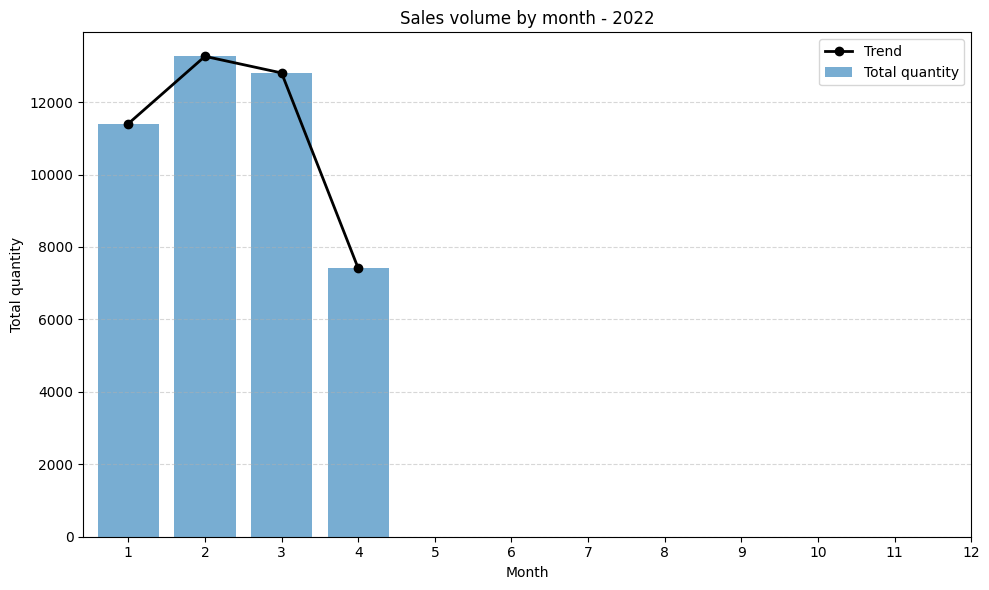

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_2022.index, monthly_sales_2022.values, label='Total quantity', alpha=0.6)
plt.plot(monthly_sales_2022.index, monthly_sales_2022.values, color='black', marker='o', linewidth=2, label='Trend')

plt.title('Sales volume by month - 2022')
plt.xlabel('Month')
plt.ylabel('Total quantity')
plt.xticks(range(1, 13))  # חודשים מ-1 עד 12
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## 2023

In [ ]:
df_2023['Month'] = pd.to_numeric(df_2023['Month'], errors='coerce')
df_2023['כמות'] = pd.to_numeric(df_2023['כמות'], errors='coerce')

monthly_sales_2023 = df_2023.groupby('Month')['כמות'].sum().sort_index()

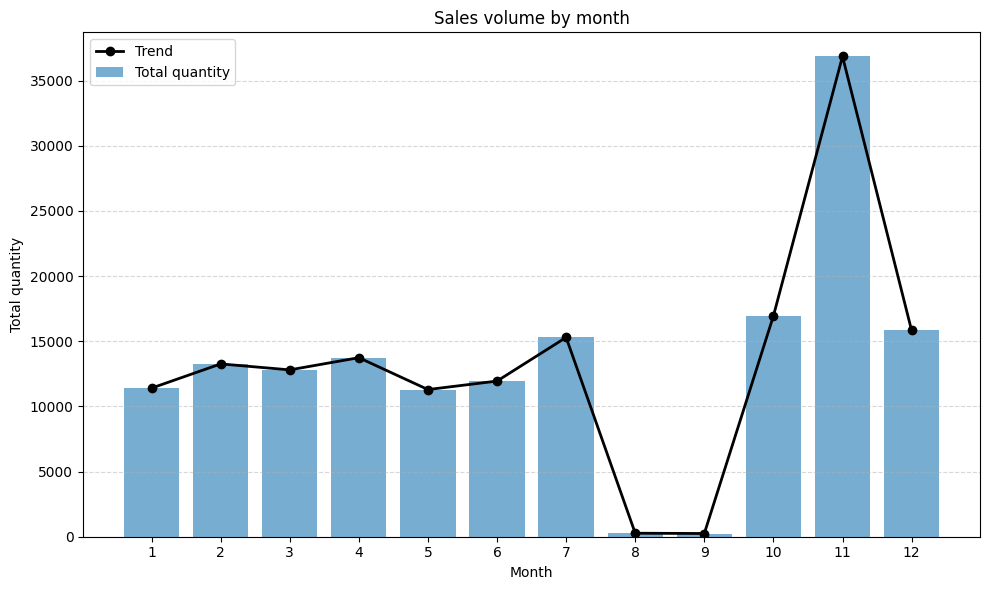

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_2023.index, monthly_sales_2023.values, label='Total quantity', alpha=0.6)
plt.plot(monthly_sales_2023.index, monthly_sales_2023.values, color='black', marker='o', linewidth=2, label='Trend')

plt.title('Sales volume by month - 2023')
plt.xlabel('Month')
plt.ylabel('Total quantity')
plt.xticks(range(1, 13))  # חודשים מ-1 עד 12
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## 2024

In [ ]:
df_2024['Month'] = pd.to_numeric(df_2024['Month'], errors='coerce')
df_2024['כמות'] = pd.to_numeric(df_2024['כמות'], errors='coerce')

monthly_sales_2024 = df_2024.groupby('Month')['כמות'].sum().sort_index()

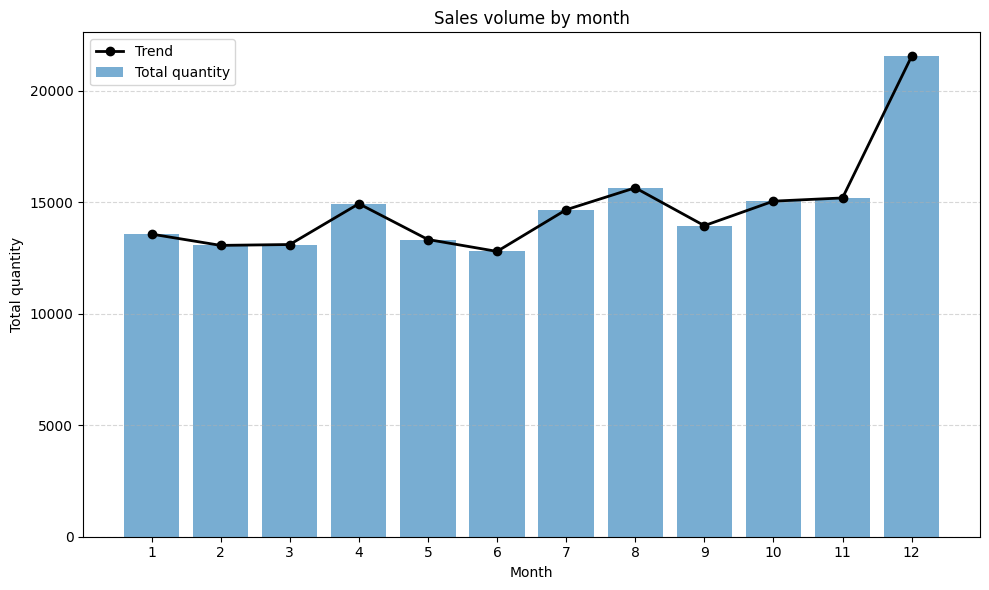

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_2024.index, monthly_sales_2024.values, label='Total quantity', alpha=0.6)
plt.plot(monthly_sales_2024.index, monthly_sales_2024.values, color='black', marker='o', linewidth=2, label='Trend')

plt.title('Sales volume by month - 2024')
plt.xlabel('Month')
plt.ylabel('Total quantity')
plt.xticks(range(1, 13))  # חודשים מ-1 עד 12
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## Graphs for all years

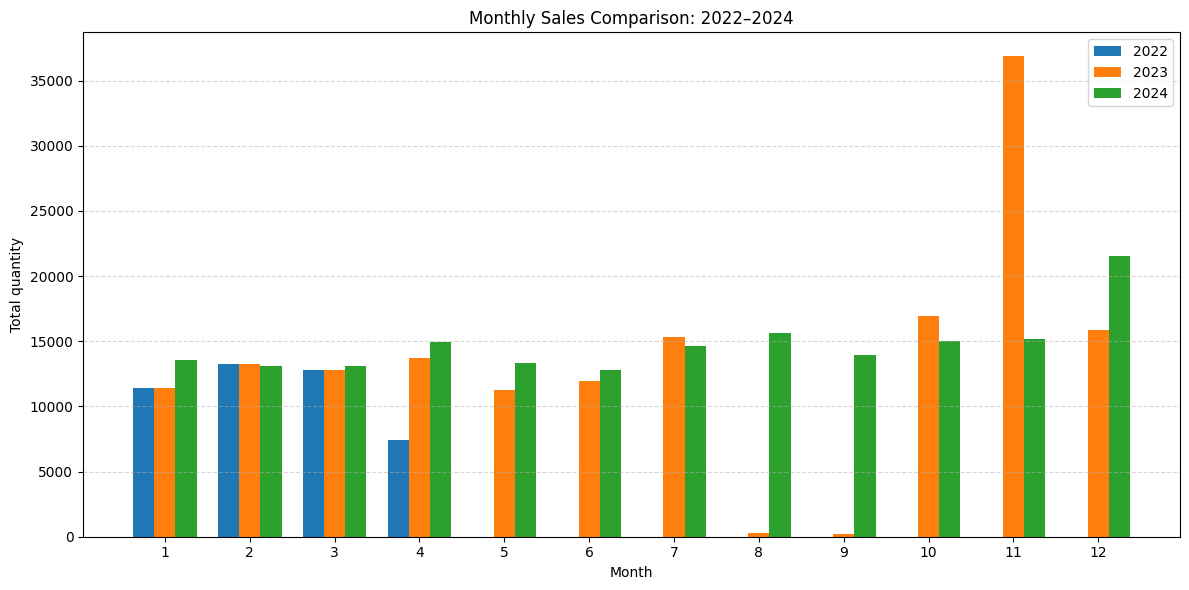

In [ ]:
months = range(1, 13)
bar_width = 0.25

# מיקום כל עמודת שנה על ציר ה-X
r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# ודא שיש ערכים לכל חודש (גם אם 0)
monthly_2022 = [monthly_sales_2022.get(month, 0) for month in months]
monthly_2023 = [monthly_sales_2023.get(month, 0) for month in months]
monthly_2024 = [monthly_sales_2024.get(month, 0) for month in months]

plt.figure(figsize=(12, 6))
plt.bar(r1, monthly_2022, width=bar_width, label='2022')
plt.bar(r2, monthly_2023, width=bar_width, label='2023')
plt.bar(r3, monthly_2024, width=bar_width, label='2024')

plt.xlabel('Month')
plt.ylabel('Total quantity')
plt.title('Monthly Sales Comparison: 2022–2024')
plt.xticks([r + bar_width for r in range(len(months))], months)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
monthly_sales_2022

,כמות
Month,
1,11406
2,13263
3,12805
4,7410


In [ ]:
monthly_sales_2023

,כמות
Month,
1,11406
2,13263
3,12805
4,13741
5,11295
6,11946
7,15297
8,269
9,247


In [ ]:
monthly_sales_2024

,כמות
Month,
1,13572
2,13066
3,13105
4,14934
5,13330
6,12796
7,14664
8,15648
9,13951
